In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, mpld3
import thermoDataGrabber as DG
%matplotlib notebook
mpld3.enable_notebook()
plt.style.use(["seaborn-talk","seaborn-notebook","seaborn-paper"])
rescale = lambda old, new: lambda x: (new[1] - new[0]) / (old[1] - old[0])*(x - old[0]) + new[0]

In [42]:
myfluid = DG.ThermoFluid("Water", "T", "P", "U", [217, 217], "viridis")
print(myfluid.data.shape)
rescaled = myfluid.data.copy()

(47089, 3)


In [36]:
tmax = max(myfluid.data["T"])
tmin = min(myfluid.data["T"])
trange = [tmin, tmax]
pmax = max(myfluid.data["P"])
pmin = min(myfluid.data["P"])
prange = [pmin, pmax]
umax = max(myfluid.data["U"])
umin = min(myfluid.data["U"])
urange = [umin, umax]


In [43]:
rescaled["T"] = rescaled["T"].apply(rescale(trange, [0,216]))
rescaled["P"] = rescaled["P"].apply(rescale(prange, [0,216]))
rescaled["U"] = rescaled["U"].apply(rescale(urange, [15, 152]))

In [44]:
for i in range(4):
    dU = 2 + i
    uSel = 25 + 25*i
    rescaled.ix[np.abs(rescaled["U"] - uSel) <= 1, 'U'] = rescaled.ix[np.abs(rescaled["U"] - uSel) <= 1 , "U"] + dU
    rescaled.ix[np.abs(rescaled["U"] - uSel - 12.5) <= 1.5, 'U'] = rescaled.ix[np.abs(rescaled["U"] - uSel - 12.5) <= 1.5 , "U"] - dU


In [45]:
myfluid.data = rescaled

<IPython.core.display.Javascript object>


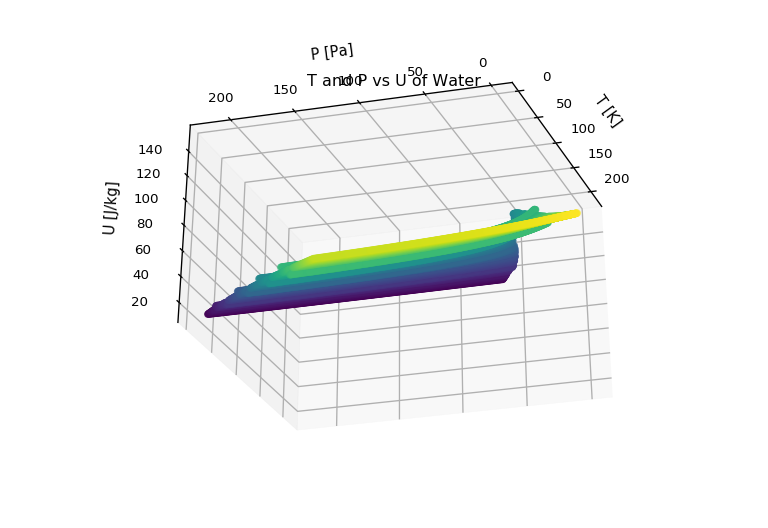

In [46]:
DG.fluid_plot(myfluid)

In [48]:
myfluid.write_data('../data/')